In [1]:
from automate import *

In [2]:
with (open("df_comparison.pkl", "rb")) as openfile:
    df = pickle.load(openfile)

In [30]:
with (open("data.pkl", "rb")) as openfile:
    data = pickle.load(openfile)

data["v_gene_one_hot"]  = data["v_gene_one_hot"].apply(lambda x: x.reshape(54))
data["j_gene_one_hot"]  = data["j_gene_one_hot"].apply(lambda x: x.reshape(13))
data = [np.stack(col.values) for _, col in data.items()]
#X_train = tf.constant(df["CDR3"].to_numpy())
#X_train_v_gene = tf.constant(df["v_gene"].to_numpy())
#X_train_j_gene = tf.constant(df["j_gene"].to_numpy())
X_train = data

In [31]:
params = {
            "latent_dim": 20,
            "dense_nodes": 75,
            "aa_embedding_dim": 21,
            "v_gene_embedding_dim": 54,
            "j_gene_embedding_dim": 13,
            "beta": 0.75,
            "max_cdr3_len": 20,
            "n_aas": 21,
            "n_v_genes": 54,
            "n_j_genes": 13,
            "stopping_monitor": "val_loss",
            "batch_size": 100,
            "pretrains": 2,
            "warmup_period": 3,
            "epochs": 4,
            "patience": 20,
            "n_inputs" : 20,
            "v_inputs" : 54,
            "j_inputs" : 13
        }

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 cdr3_input (InputLayer)        [(None, 20)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 40)           840         ['cdr3_input[0][0]']             
                                                                                                  
 batch_normalization (BatchNorm  (None, 40)          160         ['dense[0][0]']                  
 alization)                                                                                       
                                                                                                  
 v_gene_input (InputLayer)      [(None, 54)]         0           []                           

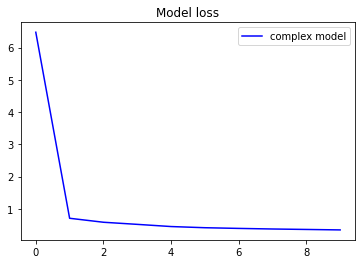

In [33]:
model, encoder = train_model_complex(df, X_train, params=params)

In [ ]:
## Inspect metaclonotypes 


## This is the file that contains metaclonotypes, let's look at the 
## metaclonotypes within MIRA55:
f = pd.read_csv('./covid19/hla_restricted_meta_clonotypes/mira_epitope_55_524_ALRKVPTDNYITTY_KVPTDNYITTY.tcrdist3.csv.ranked_centers_bkgd_ctlr_1E5.tsv', sep='\t')

## let's inspect the clonotype denoted in the table as 
## M_55_1E6+TRBV28*01+CASSLRTDHYEQYF+22+(S[RLMF][RK][ST][ND].YEQ)
index = list(f['cdr3_b_aa'].values).index('CASSLRTDHYEQYF')

## According to the table there should be 26 neighbours; indeed it's the case and
## they are here:
print(len(f['target_seqs'][index].strip('][').split(', ')))
f['target_seqs'][index]
group = f['target_seqs'][index].strip("][").replace("'", "").split(', ')
sample = df[df["CDR3"].isin(group)]
print(len(sample))
print(sample["label"].unique())

In [45]:
f

,Unnamed: 0,cdr3_b_aa,v_b_gene,j_b_gene,pgen,radius,target_hits,bkgd_hits,bkgd_hits_weighted,bkgd_total,...,TR_re,BR_re_weighted,RR_re_weighted,OR_re_weighted,chi2re,chi2joint,neighbors,K_neighbors,nsubject,novel
0,39,CASSMGHGDTEAFF,TRBV5-1*01,TRBJ1-1*01,1.034264e-09,26,30,8,1.397916,198663,...,0.086351,0.000078,1103.157847,1207.325204,11040.156594,26451.161607,"[11, 18, 19, 20, 33, 34, 35, 36, 37, 39, 40, 4...",30,13,1
1,123,CASSKGQGDTEAFF,TRBV5-1*01,TRBJ1-1*01,7.620599e-08,20,18,3,0.170535,198663,...,0.055710,0.000046,1143.105811,1274.199616,7194.913435,16582.527234,"[19, 20, 33, 34, 36, 40, 42, 43, 44, 52, 60, 6...",18,8,1
2,277,CASSSGTGDAEAFF,TRBV5-1*01,TRBJ1-1*01,5.131133e-09,32,13,16,1.852677,198663,...,0.055710,0.000030,1279.111720,1935.048914,8066.836089,14046.440200,"[11, 15, 18, 37, 42, 45, 61, 91, 137, 146, 276...",13,9,1
3,16,CASSLGQGDSEAFF,TRBV5-1*01,TRBJ1-1*01,9.025871e-09,20,11,3,1.113690,198663,...,0.033426,0.000020,1660.153203,1717.530259,4567.968707,9749.474674,"[15, 16, 17, 20, 36, 44, 52, 62, 125, 135, 324]",11,7,1
4,42,CASSRGQGDAEAFF,TRBV5-1*01,TRBJ1-1*01,3.040515e-09,22,6,1,0.056845,198663,...,0.044568,0.000030,645.615135,1544.482021,6034.720653,8934.267759,"[15, 16, 21, 42, 43, 123]",6,3,1
5,21,CASTPGQGDAEAFF,TRBV5-1*01,TRBJ1-1*01,7.660094e-10,28,7,1,0.056845,198663,...,0.038997,0.000030,737.845868,1343.587440,5034.450086,8468.972734,"[15, 19, 21, 40, 42, 92, 127]",7,4,1
6,15,CASSLGQGDAEAFF,TRBV5-1*01,TRBJ1-1*01,7.238564e-09,20,9,3,1.113690,198663,...,0.030641,0.000023,1200.539738,1362.305007,3902.001884,8021.005273,"[15, 16, 17, 36, 42, 52, 125, 135, 324]",9,6,1
7,38,CASSLSQGDTEAFF,TRBV5-1*01,TRBJ1-1*01,7.895355e-08,16,7,4,0.227381,198663,...,0.022284,0.000020,1106.768802,1131.971510,2588.523503,5959.296926,"[36, 38, 52, 125, 126, 135, 324]",7,5,1
8,199,CSAGPLGPYNEQFF,TRBV20-1*01,TRBJ2-1*01,3.629532e-10,34,5,3,1.876193,198663,...,0.016713,0.000025,662.707336,673.954486,1514.978864,3396.810957,"[199, 226, 227, 286, 288]",5,3,1
9,201,CSASWTGPYNEQFF,TRBV20-1*01,TRBJ2-1*01,1.398958e-09,22,4,0,0.000000,198663,...,0.013928,0.000017,819.721304,831.285164,1333.858194,3199.337465,"[75, 201, 227, 288]",4,4,1


In [46]:
## Inspect metaclonotypes 


## This is the file that contains metaclonotypes, let's look at the 
## metaclonotypes within MIRA55:
f = pd.read_csv('./covid19/hla_restricted_meta_clonotypes/mira_epitope_67_382_APHGVVFL_APHGVVFLHV_GVVFLHVTY_VVFLHVTYV.tcrdist3.csv.ranked_centers_bkgd_ctlr_1E5.tsv', sep='\t')

## let's inspect the clonotype denoted in the table as 
## M_55_1E6+TRBV28*01+CASSLRTDHYEQYF+22+(S[RLMF][RK][ST][ND].YEQ)
index = list(f['cdr3_b_aa'].values).index('CASSMGHGDTEAFF')

## According to the table there should be 26 neighbours; indeed it's the case and
## they are here:
print(len(f['target_seqs'][index].strip('][').split(', ')))
f['target_seqs'][index]
group = f['target_seqs'][index].strip("][").replace("'", "").split(', ')
sample2 = df[df["CDR3"].isin(group)]
print(len(sample2))
print(sample2["label"].unique())

30
1856
[219  25  71]


In [53]:
groups_index = list(sample.index) + list(sample2.index)
X_test = X_train.copy()
for i in range(len(X_test)):
    X_test[i] = X_test[i][groups_index]
print(X_test[0].shape)

(2706, 20)


In [60]:
df = pd.concat([sample, sample2])

In [55]:
X_test_encode = encoder.predict(X_test)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_test_encode)
plot_X_test = principalComponents

  0%|          | 0/2706 [00:00<?, ?it/s]

2706
(2706, 20)


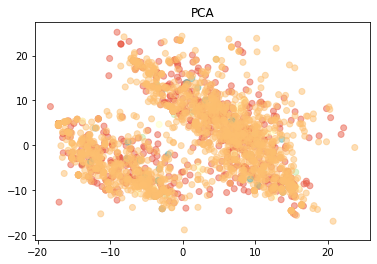

In [63]:
label = "label"
labels = []
labels_encoder = LabelEncoder()
labels_encoder = labels_encoder.fit(df[label].unique())
for k in tqdm(df.index):
    labels.append(labels_encoder.transform([df.loc[k,label]]))
labels = [int(y) for y in labels]
df[label] = labels
rgb_values = sns.color_palette("Spectral", df[label].nunique())
df[str(label+"_color")] = df[label].apply(lambda x: rgb_values[x])
print(len(X_test_encode))
print(X_test_encode.shape)
plt.scatter(plot_X_test[:,0], plot_X_test[:,1], color=df["label_color"], alpha=0.5)
plt.title("PCA")
plt.show()